# Chile Wildfire Hotspots Dataset

Chile Hotspots

Libraries we need are imported first

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

Data used in this exercise is stored in the DATA folder

In [68]:
data = '../../../DATA/chile_fire_cluster_sequence_v2.json'

The dataframe is created using the .read_csv function of Pandas

In [71]:
hotspot = pd.read_json(data)

The original CSV file is structured as a dataframe with the corresponding categories

In [74]:
hotspot = hotspot[hotspot['mir_bt'].notna()]
hotspot = hotspot[hotspot['frp'].notna()]

After renaming the variable of the dataframe, we use .describe() to see essential statistics for each variable

## Scatter Plots

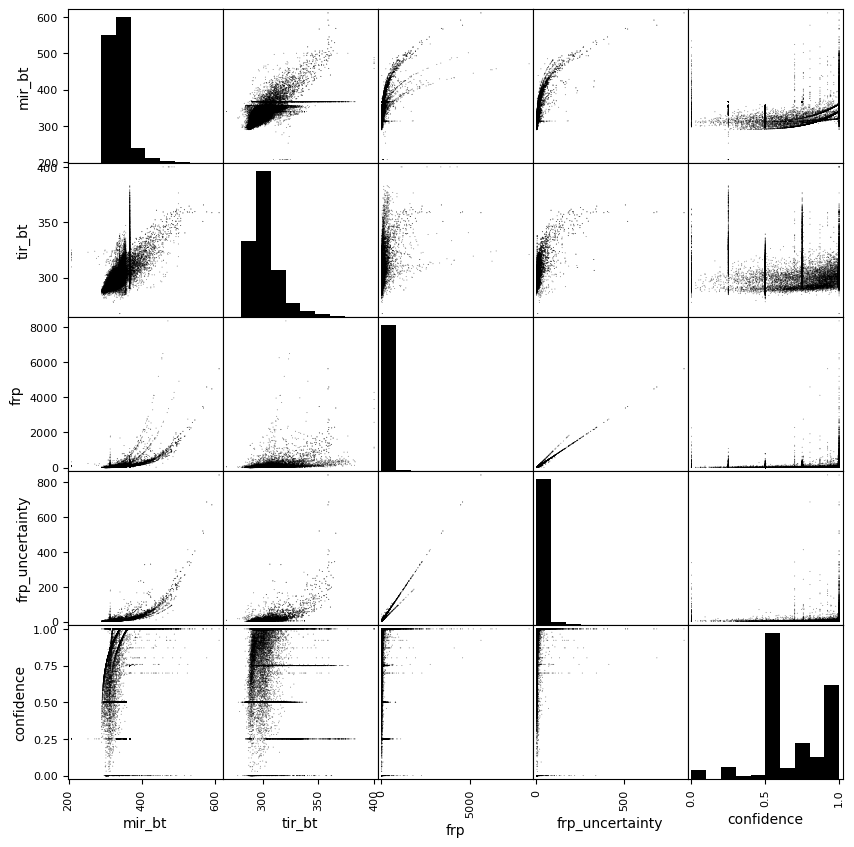

In [78]:
fig, ax = pl.subplots(figsize=(10, 10)) 
ax = pd.plotting.scatter_matrix(hotspot[['mir_bt', 'tir_bt', 'frp','frp_uncertainty','confidence']],ax=ax,s=2,c='k',hist_kwds={'color':['black']});

In [41]:
hotspot['satellite'].unique()

array(['SUOMI-NPP', 'NOAA-20', 'MetOp-C', 'AQUA', 'MetOp-B', 'TERRA',
       'SENTINEL-3B', 'SENTINEL-3A'], dtype=object)

## Box Plots

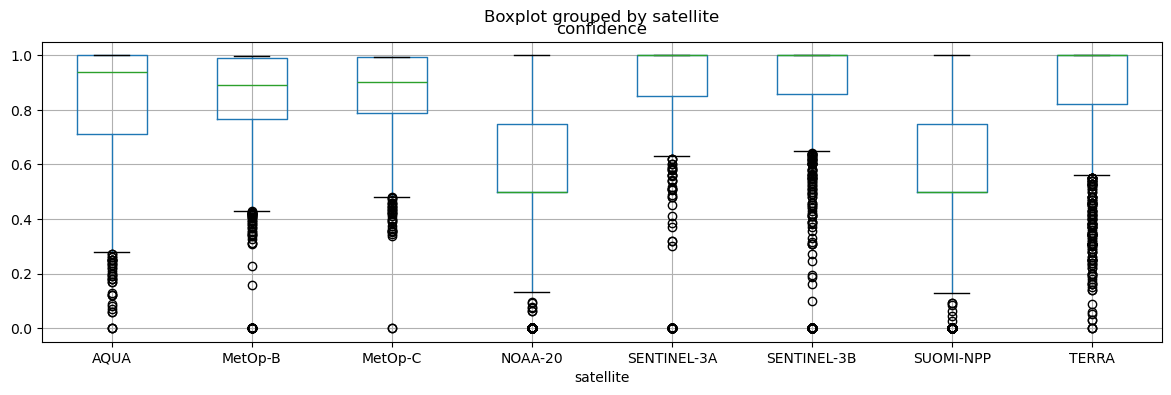

In [43]:
fig, ax = pl.subplots(figsize=(14, 4)) 
hotspot.boxplot('confidence', by='satellite', ax=ax);

In [52]:
X = hotspot[['mir_bt']]
Y = hotspot[['frp']]

## Simple Linear Regression

In [55]:
reg = LinearRegression().fit(X, Y)

In [57]:
reg.coef_

array([[4.68961413]])

In [59]:
reg.intercept_

array([-1511.6432085])

In [61]:
y_pred = reg.predict(X)

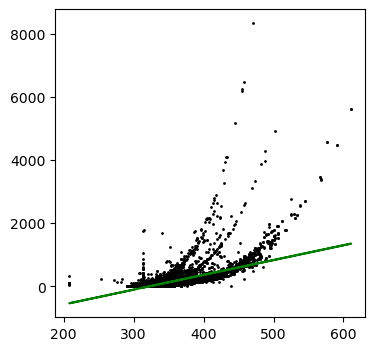

In [63]:
fig, ax = pl.subplots(figsize=(4, 4)) 
ax = pl.scatter(X, Y, color = 'k', s=1)
ax = pl.plot(X, reg.predict(X), color = 'g')